In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

spam_df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])
spam_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam_df.info()
print("\nShape of SMS spam: ",spam_df.shape)
spam_df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

Shape of SMS spam:  (5572, 2)


,count
label,
ham,4825
spam,747


Find and Drop Null, Duplicates

In [4]:
spam_df.isnull().sum()  # displaying null values

,0
label,0
message,0


In [6]:
spam_df.duplicated().sum() # displaying duplicates

np.int64(403)

In [7]:
spam_df = spam_df.drop_duplicates(keep='first')  # dropping duplicates
spam_df.duplicated().sum()

np.int64(0)

In [8]:
print(spam_df['label'].value_counts())

label
ham     4516
spam     653
Name: count, dtype: int64


Visualisation of target

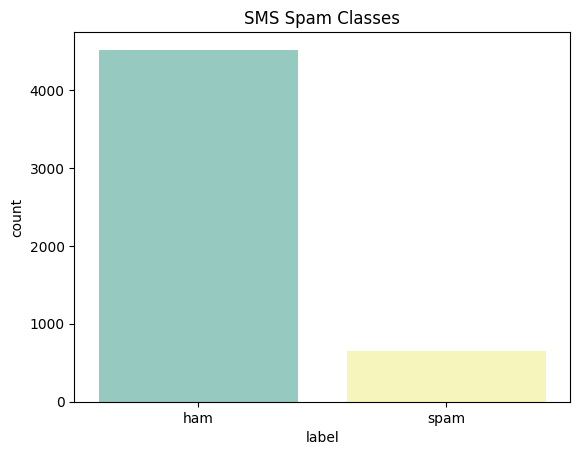

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=spam_df, palette='Set3')
plt.title('SMS Spam Classes')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

spam_labelEncode = LabelEncoder()
spam_df['label']= spam_labelEncode.fit_transform(spam_df['label'])
spam_df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name
